In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#возможно этот нотербук кроме автора никто никогда не посмотрит, но все равно я оставлю некоторые коментарии для этого решения или набора решений
# начнем с того что от полуфинала я ожидал большего, а в итоге задача свелась к трем параметрам (которые сводятся к одному параметру ибо остольное это координаты)
# возможно было бы намного интересниее если помимо параметры NTG(являющееся отношением значения "песочности" к все породе), оставить еще значения глубины месторождения
# или сесторождений и их протяженность, тогда бы можно было бы опираться не только на средние значения перепадов коофециентов соответсвующие основным законам статистики,
# но и на результаты моделирование каждого пласта в зависимости от глубины и протяженности. 
# Помимо этого было бы интересно знать протяженность всей размерной сетки, допустим дальность между координатами равна (1 дециметр/метр/километр)
# благодаря этому можно было бы опираться на знания в других сферах детяельности(ГИС, геодиезия и тп) и учитывать факторы касающиеся предметной области.


In [2]:
# Данная функция отвечает за визуализацию графика трехмерной сетки
# данная функция отвечает не за физичекое представления/моделирования всей координатной  сетик  , а для понятия валидности полученных данных предсказаний ()
# так как перепады не должны быть слишком резкие и должны хотя бы в какой то степени соотвествость законам статистики, а именно нормальным распределением 
def Visual(X,Y,Z):   
    ####визуализация прогноза
    
    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_trisurf(X, Y, Z, cmap=cm.jet, linewidth=0.1)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    
    C = plt.tricontour(X, Y, Z, colors='black', linewidths=1)
    plt.tricontourf(X, Y, Z)
    plt.clabel(C, inline=1, fontsize=10)
    plt.show()
    
    plt.style.use('fivethirtyeight')
    Z=df_train['NTG']
    #z=sorted(z)

    plt.hist(Z, bins = 100, edgecolor = 'k');
    plt.xlabel('NTG'); plt.ylabel('Кол-во повторений');
    plt.title('Гистограмма частотного анализа');

In [3]:
# Данная функция отвечает за визуализацию графика четырехмерной сетки сетки
# данная функция отвечает не за физичекое представления/моделирования всей координатной  сетик  , а для понятия валидности полученных данных предсказаний ()
# так как перепады не должны быть слишком резкие и должны хотя бы в какой то степени соотвествость законам статистики, а именно нормальным распределением 
def  VisualF(X,Y,Z):
    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_surface(B1, B2, Z, cmap=cm.jet, linewidth=0.1)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

    C = plt.contour(B1, B2, Z, colors='black', linewidths=1)
    plt.contourf(B1, B2, Z)
    plt.clabel(C, inline=1, fontsize=10)
    plt.show()

In [4]:
# функция экспорта для загрузки на сайт проверки 
def  Export(filename,y_pred):
    df_export=pd.read_csv('Empty_part.csv')
    df_export['NTG'] = y_pred
    df_export.to_csv('out/'+filename+'.csv', sep=',',index=False)

In [5]:
# дальнейший код я не вижу смысла коментировать ибо и так все понятно. для того чтобы, в дальнейшим осуществлять предсказания требуется создать 
# датафреймы для удобного множественного использовнаия 
df_test = pd.read_csv('Empty_part.csv')
df_train = pd.read_csv('Training_wells.csv')

In [6]:
df_test = df_test.drop(['Well'], axis=1)
df_train = df_train.drop(['Well'], axis=1)

In [7]:
print(df_train)
print(df_test)

       X    Y     NTG
0    201  907  0.2006
1    201  914  0.3624
2    201  924  0.4381
3    202  922  0.4289
4    202  925  0.4021
..   ...  ...     ...
133  245  908  0.2719
134  245  911  0.3780
135  245  923  0.4239
136  246  905  0.4900
137  246  923  0.3667

[138 rows x 3 columns]
        X    Y
0     201  901
1     201  902
2     201  903
3     201  904
4     201  905
...   ...  ...
1237  246  926
1238  246  927
1239  246  928
1240  246  929
1241  246  930

[1242 rows x 2 columns]


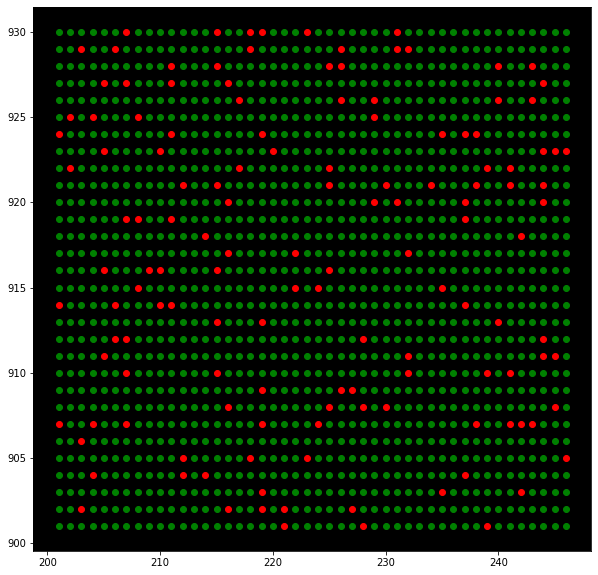

In [8]:
df = df_train
x = df['X']
y = df['Y']

fig, ax = plt.subplots()

ax.scatter(x, y,c = 'red')    #  цвет точек

df = df_test
x = df['X']
y = df['Y']

ax.scatter(x, y, c = 'green')    #  цвет точек
ax.set_facecolor('black')

fig.set_figwidth(10)     #  ширина и
fig.set_figheight(10)    #  высота "Figure"

##На данном слайде указана карта изветсных скважин(Выдеделено красным), неизвестные скважины (зеленые точки)
plt.show()

0      0.2006
1      0.3624
2      0.4381
3      0.4289
4      0.4021
        ...  
133    0.2719
134    0.3780
135    0.4239
136    0.4900
137    0.3667
Name: NTG, Length: 138, dtype: float64


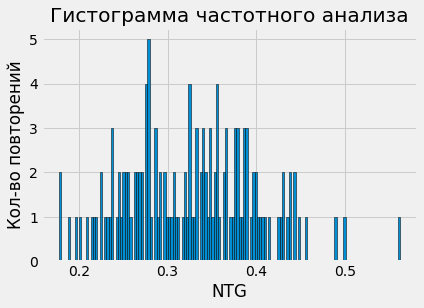

In [9]:
plt.style.use('fivethirtyeight')
z=df_train['NTG']
#z=sorted(z)
print(z)
plt.hist(z, bins = 150, edgecolor = 'k');
plt.xlabel('NTG'); plt.ylabel('Кол-во повторений');
plt.title('Гистограмма частотного анализа');

##TODO почистить значения, сто проц убрать пик 235	903	0,5625


In [10]:
df = pd.concat([df_train, df_test])#объединяем фреймы
df['NTG'].fillna(0.0, inplace=True)#зануляем пропуски для построение поверхности
print(df)


        X    Y     NTG
0     201  907  0.2006
1     201  914  0.3624
2     201  924  0.4381
3     202  922  0.4289
4     202  925  0.4021
...   ...  ...     ...
1237  246  926  0.0000
1238  246  927  0.0000
1239  246  928  0.0000
1240  246  929  0.0000
1241  246  930  0.0000

[1380 rows x 3 columns]


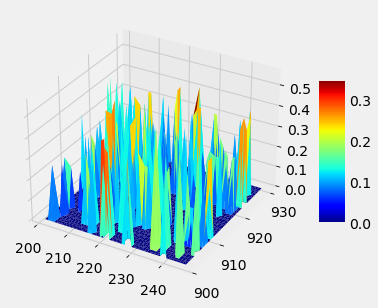

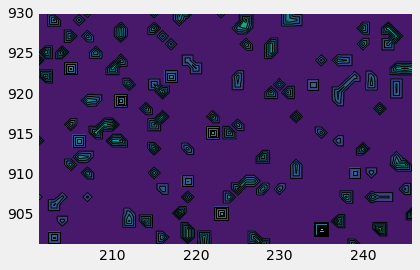

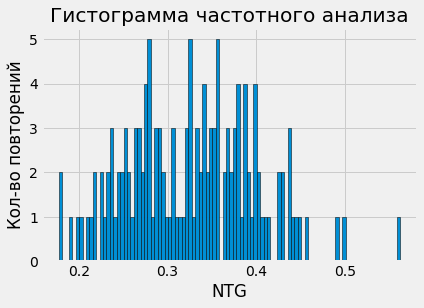

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
X = df['X']
Y = df['Y']
Z = df['NTG']

# визуализация изветсных пиков с зануленнмыми неизветными, просто для наглядности
Visual(X,Y,Z)

In [12]:
# преобразования перед прогнозом
X_train= df_train[['X','Y']]
y_train= df_train['NTG']
X_test= df_test[['X','Y']]

print(X_train)
print(y_train)
print(X_test)

       X    Y
0    201  907
1    201  914
2    201  924
3    202  922
4    202  925
..   ...  ...
133  245  908
134  245  911
135  245  923
136  246  905
137  246  923

[138 rows x 2 columns]
0      0.2006
1      0.3624
2      0.4381
3      0.4289
4      0.4021
        ...  
133    0.2719
134    0.3780
135    0.4239
136    0.4900
137    0.3667
Name: NTG, Length: 138, dtype: float64
        X    Y
0     201  901
1     201  902
2     201  903
3     201  904
4     201  905
...   ...  ...
1237  246  926
1238  246  927
1239  246  928
1240  246  929
1241  246  930

[1242 rows x 2 columns]


[0.236  0.236  0.236  ... 0.3908 0.3908 0.3908]


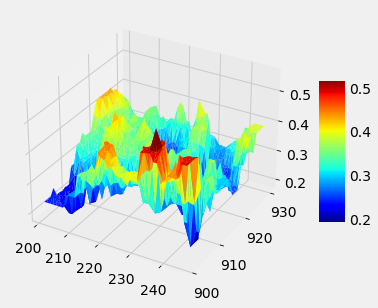

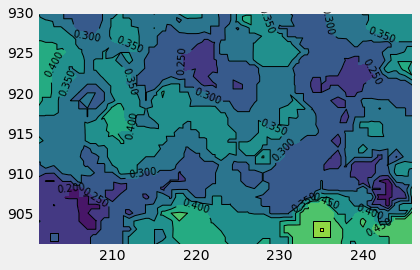

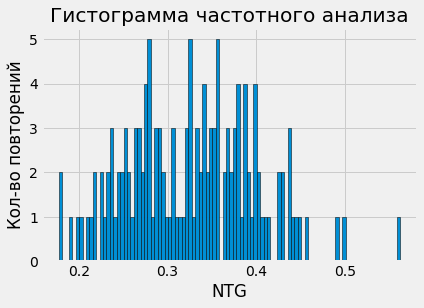

In [13]:
# кнн регрессия 49046372
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
KNeighborsRegressor(...)
y_pred=neigh.predict(X_test)
print(y_pred)

###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

Visual(X,Y,Z)
Export('KNeighborsRegressor2',y_pred)

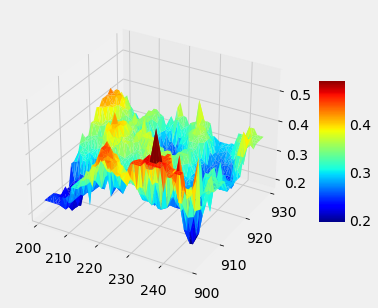

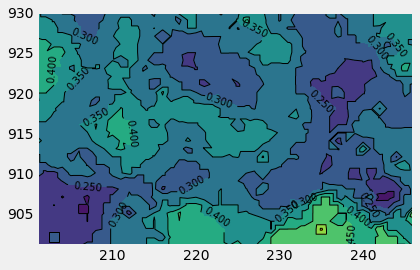

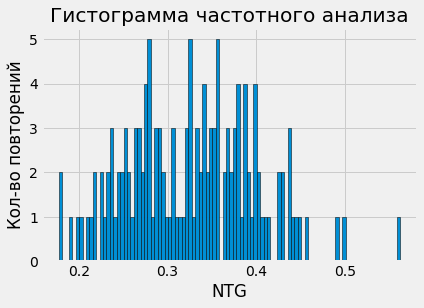

In [14]:
# кнн регрессия 3 соседей //49046374
from sklearn import neighbors
n_neighbors = 3
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_pred = knn.fit(X_train, y_train).predict(X_test)

###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

Visual(X,Y,Z)
Export('KNeighborsRegressor3',y_pred)

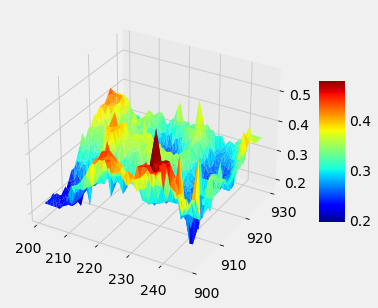

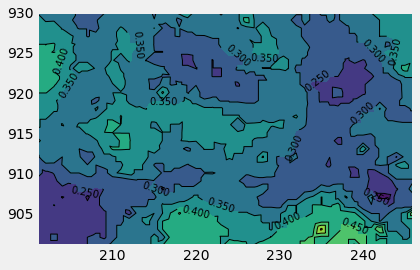

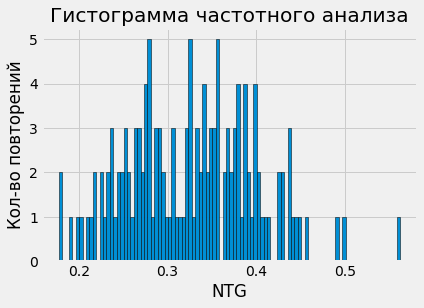

In [15]:
# кнн регрессия 4 соседей 49046376
from sklearn import neighbors
n_neighbors = 4
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_pred = knn.fit(X_train, y_train).predict(X_test)

###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

Visual(X,Y,Z)
Export('KNeighborsRegressor4',y_pred)

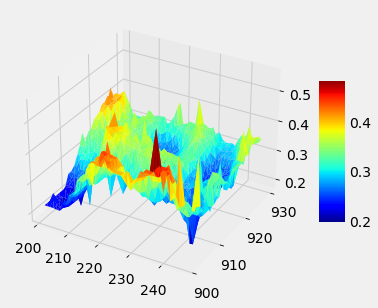

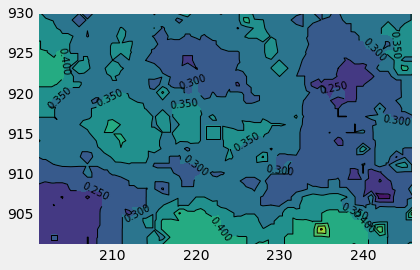

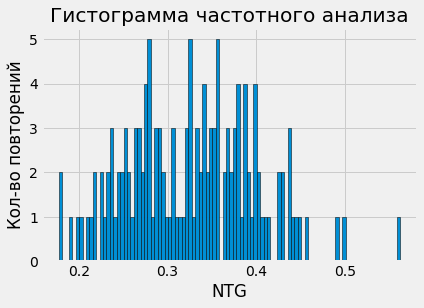

In [16]:
# кнн регрессия 5 соседей 49046378
from sklearn import neighbors
n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_pred = knn.fit(X_train, y_train).predict(X_test)

###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

Visual(X,Y,Z)
Export('KNeighborsRegressor5',y_pred)

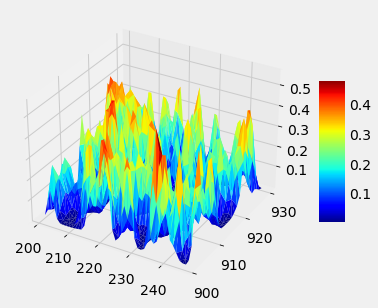

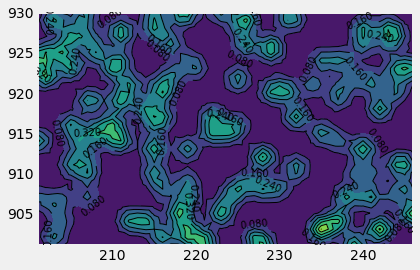

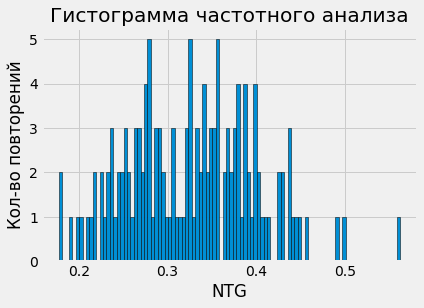

In [17]:
# гауспроцесс регрессия //49046362
from sklearn import gaussian_process

model= gaussian_process.GaussianProcessRegressor()
y_pred = model.fit(X_train, y_train).predict(X_test)

###преобразование для визуализации
X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

Visual(X,Y,Z)
Export('GaussianProcessRegressor',y_pred)

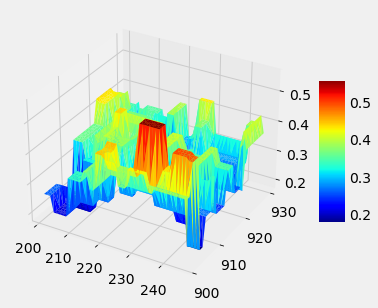

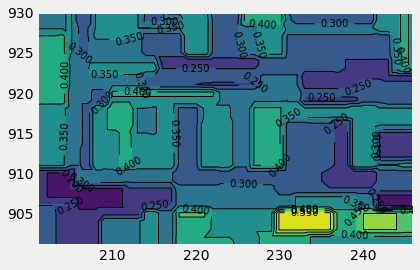

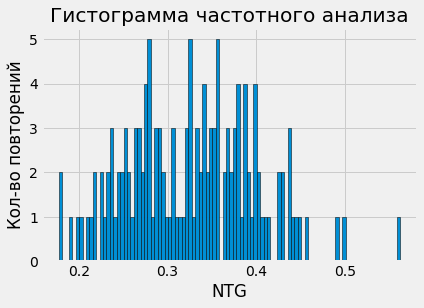

In [18]:
# древесная регерессия //49046358
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

Visual(X,Y,Z)
Export('DecisionTreeRegressor',y_pred)

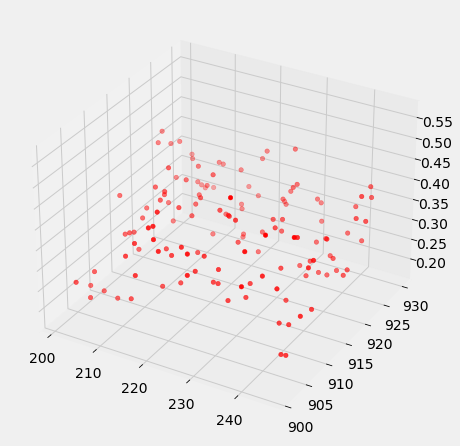

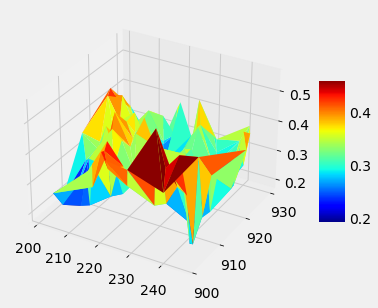

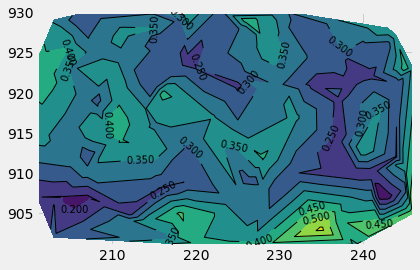

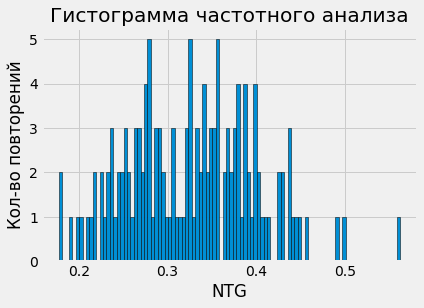

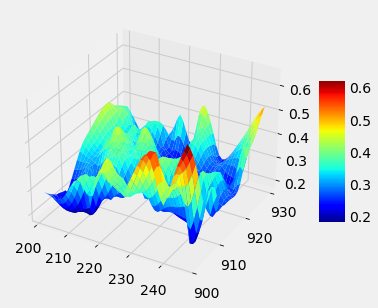

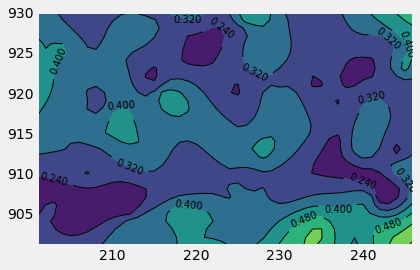

[[201. 202. 203. ... 244. 245. 246.]
 [201. 202. 203. ... 244. 245. 246.]
 [201. 202. 203. ... 244. 245. 246.]
 ...
 [201. 202. 203. ... 244. 245. 246.]
 [201. 202. 203. ... 244. 245. 246.]
 [201. 202. 203. ... 244. 245. 246.]]
[[901. 901. 901. ... 901. 901. 901.]
 [902. 902. 902. ... 902. 902. 902.]
 [903. 903. 903. ... 903. 903. 903.]
 ...
 [928. 928. 928. ... 928. 928. 928.]
 [929. 929. 929. ... 929. 929. 929.]
 [930. 930. 930. ... 930. 930. 930.]]
[[0.29026729 0.28720512 0.28227525 ... 0.59218414 0.62426445 0.65575243]
 [0.27416303 0.27028229 0.2628     ... 0.57075074 0.59872498 0.62929321]
 [0.25978248 0.25535315 0.24293668 ... 0.53125838 0.55955778 0.59347631]
 ...
 [0.38832771 0.37692627 0.36539005 ... 0.42734001 0.45289463 0.472534  ]
 [0.37684752 0.36209221 0.3452     ... 0.46062293 0.48167775 0.49905946]
 [0.36576596 0.34837427 0.32856047 ... 0.48510465 0.50545812 0.52266457]]


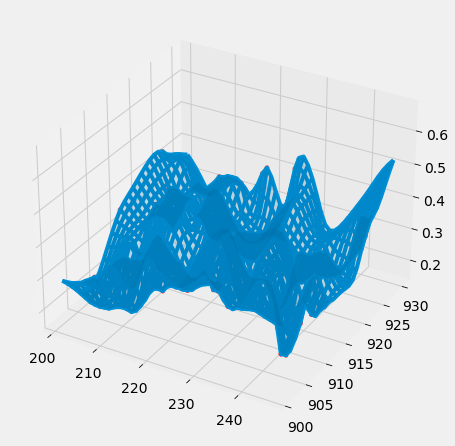

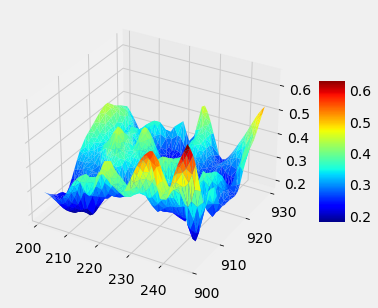

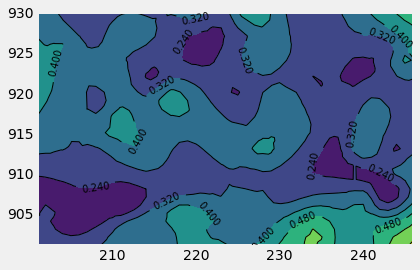

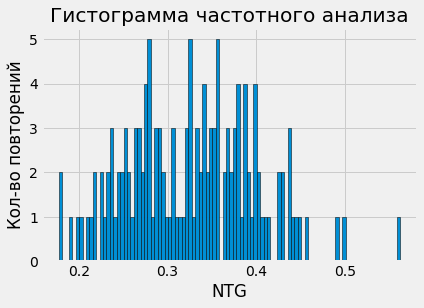

In [19]:
# ######данное решение в теории должно быть наиболее точным, но есть одно "но" , наиболее вероятно что проверочный датасет для 
# задания был сгенерирован с особыми условия к которым может относиться как архетиктура ЭВМ так и псевдорондомные значения
# Суть этого решения в том что мы попытаемя восоздать значения функции которой может описывтаься эта поверхность (по изветсным точкам)
#  и мы найдем значения этой треххмерной функции в точках пустого датасета  49046387
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# %matplotlib inline
import random
# set seed to reproducible
# random.seed(1)
# попробовать заунилть координаты
x = X_train['X'].tolist()
y = X_train['Y'].tolist()
z = df_train['NTG'].tolist()
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.scatter3D(x,y,z, c='r')


x_grid = np.linspace(201,246, 46)
y_grid = np.linspace(901, 930, 30)

B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')
Z = np.zeros(( len(x), len(y) ))

import scipy as sp
import scipy.interpolate
spline = sp.interpolate.Rbf(x,y,z,function='thin_plate')

Z = spline(B1,B2)


np.savetxt('B1.csv', B1, delimiter=',')
np.savetxt('B2.csv', B2, delimiter=',')
np.savetxt('Z.csv', Z, delimiter=',')


Visual(x,y,z)
VisualF(B1, B2, Z)

print(B1)
print(B2)
print(Z)


# Visual(B1,B2,Z)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2)
ax.scatter3D(x,y,z, c='r')


df_exportSpline=pd.read_csv('Empty_part.csv')
x = df_exportSpline['X'].tolist()
y = df_exportSpline['Y'].tolist()
arr=[]
for i in range(0,len(x)):
    arr.append(Z[y[i]-901][x[i]-201])
Export('Spline', arr)

Visual(x,y,arr)
# ########

[0.24116366 0.24116366 0.2762878  ... 0.42052094 0.42052094 0.42052094]


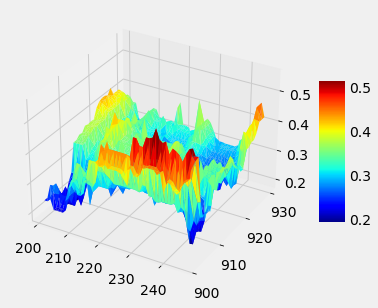

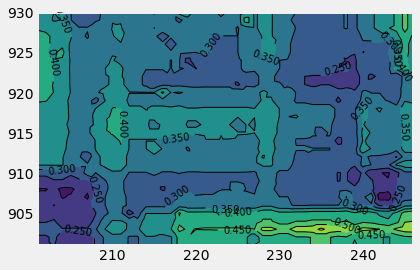

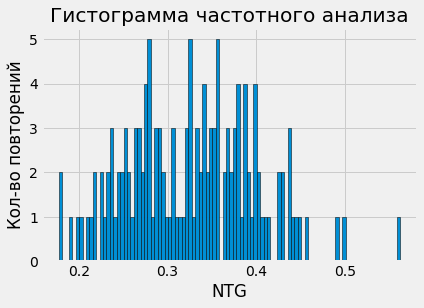

In [20]:
# 49046364
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor().fit(X_train, y_train)

y_pred = est.predict(X_test)

print(y_pred)
###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()
Export('GradientBoostingRegressor', y_pred)
Visual(X,Y,Z)

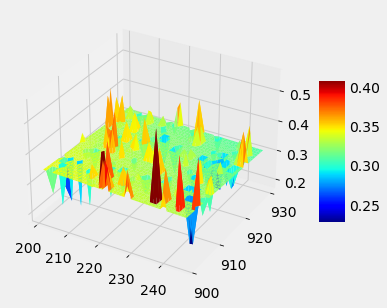

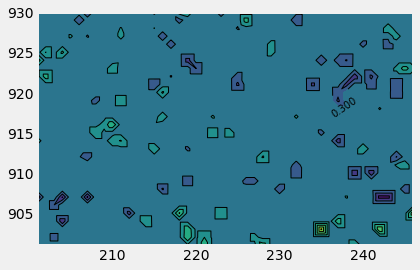

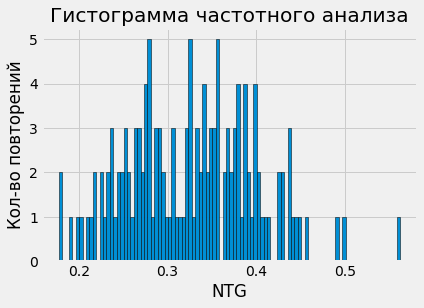

In [21]:
# линейная регрессия 49046383
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

y_pred= regressor.predict (X_test)

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

Export('LinearRegression', y_pred)
####визуализация прогноза
Visual(X,Y,Z)


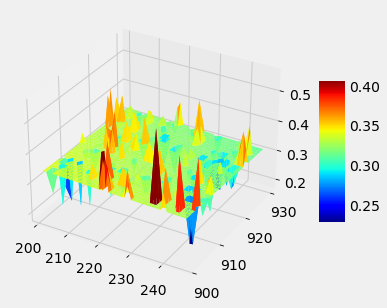

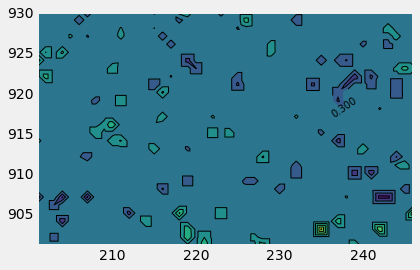

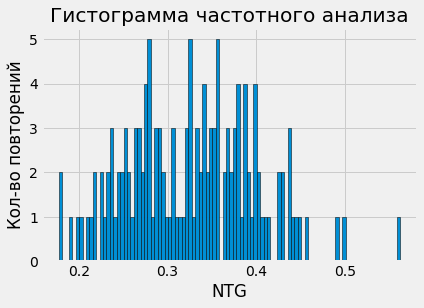

In [22]:
## кольцо баес лол)
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_pred= reg.predict (X_test)



###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

####визуализация прогноза
Visual(X,Y,Z)

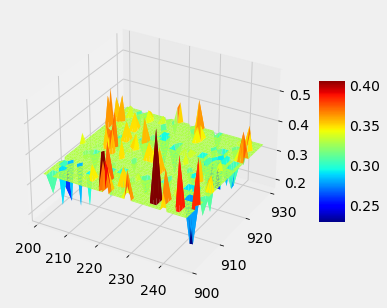

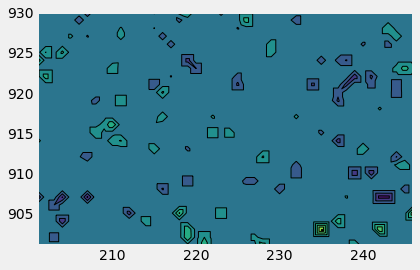

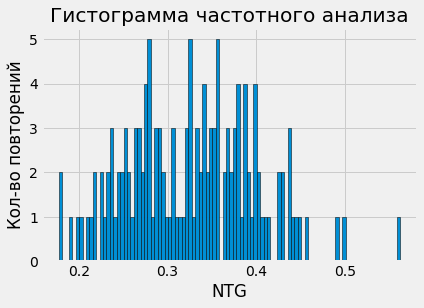

In [23]:
# метод опорных векторв
from sklearn import svm
clf = svm.SVR()
clf.fit(X_train, y_train) 
y_pred =clf.predict(X_test)

###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

####визуализация прогноза
Visual(X,Y,Z)

[10.11352784 10.14407284 10.17461785 ...  7.0444188   7.0749638
  7.1055088 ]


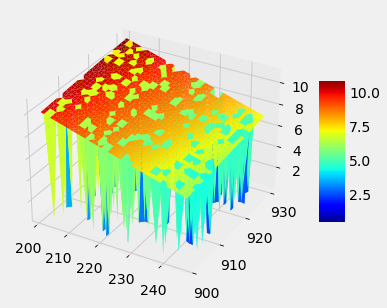

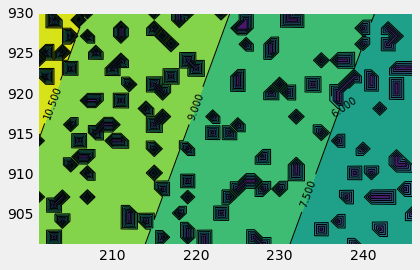

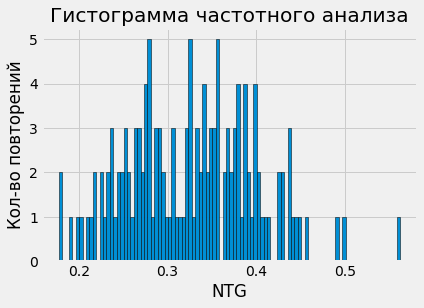

In [24]:
# нейронОчка
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor().fit(X_train, y_train)
y_pred=regr.predict(X_test)

print(y_pred)
###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()


####визуализация прогноза

Visual(X,Y,Z)